<>:66: SyntaxWarning: invalid escape sequence '\s'
<>:66: SyntaxWarning: invalid escape sequence '\s'
C:\Users\TXB909\AppData\Local\Temp\ipykernel_5712\26585765.py:66: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(path + datafile, sep=',\s*', engine='python')


6.79185011987


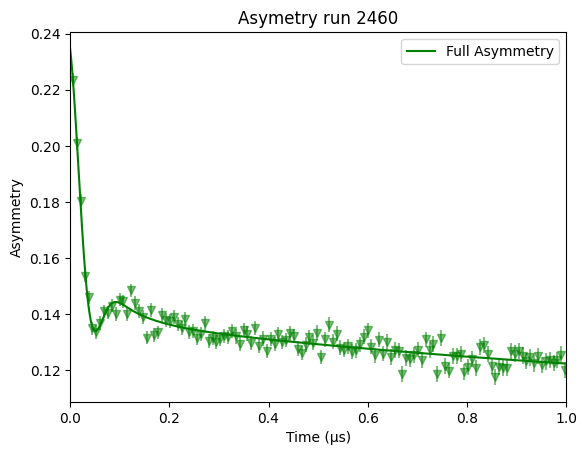

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def muon_asymmetry(
    t,
    f_F,             # ordered volume fraction
    sigma,             # sigma of YBO ordered gaussian
    nu,              # frequency ν
    phi,             # phase φ in degrees
    lam_tail,        # λ_tail
    lam_para,        # λ_paramagnetic
    lam_Ag,          # λ_Ag       
    beta_tail=1,       # β_tail
    beta_para=1,          # β_2
    beta_Ag=1,
    A_T=0.2392,
    Ag_F=0.5          
):
    # Convert phase to radians
    phi_rad = np.pi * phi / 180
    
    #convert field back to frequency
    mu_gyro = 0.0135538817
    nu = nu*mu_gyro
    print(nu)

    # Ordered YBO component 
    term1 = f_F * (2/3) * np.exp(-0.5 * (sigma * t)**2) * np.cos(2 * np.pi * nu * t + phi_rad)
    
    # Ordered Tail exponential decay
    term2 = f_F * (1/3) * np.exp(-(lam_tail * t)**beta_tail)
    
    # Disordered YBO paramagnetic component
    term3 = (1 - f_F) * np.exp(-(lam_para * t)**beta_para)
    
    # Silver (Ag) component
    term4 = np.exp(-(lam_Ag * t)**beta_Ag)
    
    # Full asymmetry function
    A = A_T * (1 - Ag_F) * (term1 + term2 + term3) + A_T * Ag_F * term4

    return A

#path = 'C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/'

path = 'C:/Users/TXB909/Documents/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/'
datafile = '2460_80pack_0_1.dat'


times = np.linspace(0,1, 10000)
t=np.array(times)
f_F=0.8369
sigma=28.5
nu=501.1
phi=21.5
lam_tail=15.3
lam_para=1 
lam_Ag=0.038          # λ_Ag     
beta_tail=1       # β_ta   
beta_para=1         # β_2
beta_Ag=1
A_T=0.2392
Ag_F=0.5 


df = pd.read_csv(path + datafile, sep=',\s*', engine='python')
plt.ylabel('Asymmetry')
plt.xlabel('Time (μs)')
x=df['xData0']
y=df['data0']
yerr=df['errData0']
plt.errorbar(x, y, yerr=yerr, fmt='vg',alpha=.5)
A=muon_asymmetry(t, f_F,sigma,nu,phi,lam_tail,lam_para,lam_Ag,beta_tail,beta_para,beta_Ag,A_T,Ag_F)

plt.xlim(0,1)
plt.plot(times, A, label='Full Asymmetry', color='g')
plt.legend()
plt.title('Asymetry run 2460')
plt.show()

